# National generation capacity
##### https://data.open-power-system-data.org/national_generation_capacity/

### Description
##### Aggregated generation capacity by technology and country
 ***
### Notes
##### This data package comprises technology-specific aggregated generation capacities for European countries. The generation capacities are consistently categorized based on fuel and technology. For each European country, various references are used ranging from international (e.g. ENTSOE or EUROSTAT) to national sources from e.g. regulatory authorities. The input data is processed in the script linked below.
 ***
### Geographical scope
##### Austria, Belgium, Bulgaria, Switzerland, Czech Republic, Germany, Denmark, Estonia, Spain, Finland, France, Greece, Hungary, Irland, Italy, Lithuania, Luxemburg, Latvia, the Netherlands, Norway, Poland, Portugal, Romania, Sweden, Slovenia, Slovakia, United Kingdom
 ***
### Sources
##### EUROSTAT | UN Statistical Office | ENTSOE Statistics | ENTSOE Power Statistics | ENTSOE SO&AF | ENTSOE Transparency Platform | e-control | ELIA | TSO Bulgaria | BFE | ERU | BMWi | DEA | Statistics Estonia | REE | RTE | Statistics Finland | Department of Energy & Climate Change UK | REA | HOPS | Mavir | Eirgrid | Terna | Litgrid | Central Statistical Bureau of Latvia | Tennet | Statistics Norway | CIRE | REN | ANRE | Swedish Energy Agency | Agencija za energijo | Statistical Office of Slovakia
 ***

### Field documentation 
##### national generation capacity stacked.csv

| Field Name            | Type (Format)  | Description                                                                         |
|-----------------------|----------------|-------------------------------------------------------------------------------------|
| id                    | integer        | ID for data entries                                                                 |
| technology            | string         | Generation technology defined by fuel and conversion technology                     |
| source                | string         | Source of data entry                                                                |
| source_type           | string         | Type of data source                                                                 |
| year                  | integer (YYYY) | Year of data entry                                                                  |
| country               | string         | Country ISO code                                                                    |
| capacity_definition   | string         | Capacity definition used in the relevant source (net, gross, or unknown)            |
| capacity              | float          | Installed capacity in MW (MegaWatt)                                                 |
| energy_source_level 0 | boolean        | Energy source level 0 (total aggregated capacity)                                   |
| energy_source_level_1 | boolean        | Energy source level 1 (aggregation or classification by type of fuel)               |
| energy_source_level_2 | boolean        | Energy source level 2 (aggregation or classification by fuel)                       |
| energy_source_level_3 | boolean        | Energy source level 3 (aggregation or classification by fuel refined for bioenergy) |
| technology_level      | boolean        | Technology (aggregation or classification by fuel and technology)                   |
|                       |                |                                                                                     |

***

### Notation
##### As we compile different source for national generation capacity, we define a consolidated classifiation scheme based on energy sources and technologies. The classification scheme is related to four different energy source levels, to reflect the structural relations among the categories:

<ul>
<li>Energy source level 0 - Total generation capacity</li>
<li>Energy source level 1 - Generation capacity by energy type (fossil, nuclear, renewable, other)</li>
<li>Energy source level 2 - Generation capacity by fuel or energy source (e.g. coal, lignite, hard coal, natural gas, wind)</li>
<li>Energy source level 3 - Generation capacity by fuel or energy source and detailed fuel for bioenergy</li>
<li>Technology level - Generation capacity by fuel and technology (e.g. combined cycle natural gas, gas turbine, onshore wind, offshore wind)</li>
</ul>

##### Additionally, the definition of the energy source levels ensures that the total capacity is identical for each energy source level.

##### Moreover, some specific comments on particular categories:

| Category/Technology                 | Note                                                                                                                                                              |
|-------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Differently categorized …           | These categories comprise either capacities which cannot be assigned to specific categories at the same level, or capacities with unspecified fuel or technology. |
| Reservoir including pumped storage  | Aggregated capacity of reservoirs and pumped storage, or combinations of both. Relevant for AT.                                                                   |
| Pumped storage with natural inflow  | Pumped storage with natural inflow, or reservoirs with pumping capacity.                                                                                          |
|                                     |                                                                                                                                                                   |

***

# Si eseguono le prime operazioni sul DataFrame

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\national_generation_capacity_stacked.csv')

In [3]:
#Vengono rimosse le colonne non utilizzabili per il Data Mining.
data_e = data.drop(['weblink', 'comment', 'type'], axis = 1)

data_e

ID    technology                    source           source_type  \
0         0  Fossil fuels                 e-control  Regulatory Authority   
1         1  Fossil fuels                 e-control  Regulatory Authority   
2         2  Fossil fuels                 e-control  Regulatory Authority   
3         3  Fossil fuels                 e-control  Regulatory Authority   
4         4  Fossil fuels                 e-control  Regulatory Authority   
...     ...           ...                       ...                   ...   
37274  3595         Total  ENTSO-E Power Statistics     Other association   
37275  3596         Total  ENTSO-E Power Statistics     Other association   
37276  3597         Total  ENTSO-E Power Statistics     Other association   
37277  3598         Total  ENTSO-E Power Statistics     Other association   
37278  3599         Total  ENTSO-E Power Statistics     Other association   

       year country capacity_definition  capacity  energy_source_level_0  \
0      2014      AT      Gross capacity  7243.634                  False   
1      2015      AT      Gross capacity  7059.065                  False   
2      2016      AT      Gross capacity  7323.000                  False   
3      2017      AT      Gross capacity  6469.000                  False   
4      2018      AT      Gross capacity  6492.000                  False   
...     ...     ...                 ...       ...                    ...   
37274  2014      SK        Net capacity  7800.000                   True   
37275  2015      SK        Net capacity  7816.160                   True   
37276  2016      SK        Net capacity  7556.000                   True   
37277  2017      SK        Net capacity  7427.500                   True   
37278  2018      SK        Net capacity  7435.500                   True   

       energy_source_level_1  energy_source_level_2  energy_source_level_3  \
0                       True                  False                  False   
1                       True                  False                  False   
2                       True                  False                  False   
3                       True                  False                  False   
4                       True                  False                  False   
...                      ...                    ...                    ...   
37274                  False                  False                  False   
37275                  False                  False                  False   
37276                  False                  False                  False   
37277                  False                  False                  False   
37278                  False                  False                  False   

       technology_level  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
37274             False  
37275             False  
37276             False  
37277             False  
37278             False  

[37279 rows x 13 columns]

In [4]:
#Conversione da ISO 3166-1 alpha-2 codes al country_name utilizzando una funzione esterna contenuta nel file 'iso_country_codes.py'.
from iso_country_codes import CC

data_e['country_name'] = data_e['country'].replace(CC)

In [5]:
#Viene eliminata la colonna con i codici ISO 3166-1 alpha-2, ID e vengono riordinate le altre
data_energy = data_e[['technology','source','source_type','country_name','capacity_definition','capacity','energy_source_level_0',
                           'energy_source_level_1','energy_source_level_2','energy_source_level_3','technology_level']]

data_energy

#Si è scelto di eliminare i codici ISO perchè potrebbero risultare di non immediata lettura, inoltre si è deciso di non riportare l'ID.

#Perchè? - Perchè l'ID risulta essere il numero identificativo della riga all'interno del DataFrame relativo.
#Cosa vuol dire? - data_energy è dato dall'insieme di più DataFrame e quindi l'ID che identifica un array non è assoluto, ma relativo a un DataFrame contenuto in data_energy.

technology                    source           source_type  \
0      Fossil fuels                 e-control  Regulatory Authority   
1      Fossil fuels                 e-control  Regulatory Authority   
2      Fossil fuels                 e-control  Regulatory Authority   
3      Fossil fuels                 e-control  Regulatory Authority   
4      Fossil fuels                 e-control  Regulatory Authority   
...             ...                       ...                   ...   
37274         Total  ENTSO-E Power Statistics     Other association   
37275         Total  ENTSO-E Power Statistics     Other association   
37276         Total  ENTSO-E Power Statistics     Other association   
37277         Total  ENTSO-E Power Statistics     Other association   
37278         Total  ENTSO-E Power Statistics     Other association   

      country_name capacity_definition  capacity  energy_source_level_0  \
0          AUSTRIA      Gross capacity  7243.634                  False   
1          AUSTRIA      Gross capacity  7059.065                  False   
2          AUSTRIA      Gross capacity  7323.000                  False   
3          AUSTRIA      Gross capacity  6469.000                  False   
4          AUSTRIA      Gross capacity  6492.000                  False   
...            ...                 ...       ...                    ...   
37274     SLOVAKIA        Net capacity  7800.000                   True   
37275     SLOVAKIA        Net capacity  7816.160                   True   
37276     SLOVAKIA        Net capacity  7556.000                   True   
37277     SLOVAKIA        Net capacity  7427.500                   True   
37278     SLOVAKIA        Net capacity  7435.500                   True   

       energy_source_level_1  energy_source_level_2  energy_source_level_3  \
0                       True                  False                  False   
1                       True                  False                  False   
2                       True                  False                  False   
3                       True                  False                  False   
4                       True                  False                  False   
...                      ...                    ...                    ...   
37274                  False                  False                  False   
37275                  False                  False                  False   
37276                  False                  False                  False   
37277                  False                  False                  False   
37278                  False                  False                  False   

       technology_level  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
37274             False  
37275             False  
37276             False  
37277             False  
37278             False  

[37279 rows x 11 columns]

In [6]:
#Si esegue un controllo per eventuali valori mancanti.
data_energy.isnull().sum()

technology                 0
source                     0
source_type                0
country_name               0
capacity_definition        0
capacity                 946
energy_source_level_0      0
energy_source_level_1      0
energy_source_level_2      0
energy_source_level_3      0
technology_level           0
dtype: int64

#### Si vede come ci sono 946 valori mancanti (NaN) nella sola colonna 'capacity'. Non dovendo effettuare medie di alcun tipo, poichè non avrebbero uno scopo, è possibile sostituire i dati mancanti con il valore 0 senza rischiare di alterare i risultati di eventuali operazioni.

In [7]:
data_energy = data_energy.fillna(0)

In [8]:
#Si riesegue un controllo e si nota come effettivamente tutti i 'NaN' siano stati sostituiti dal valore 0.
data_energy.isnull().sum()

technology               0
source                   0
source_type              0
country_name             0
capacity_definition      0
capacity                 0
energy_source_level_0    0
energy_source_level_1    0
energy_source_level_2    0
energy_source_level_3    0
technology_level         0
dtype: int64

In [9]:
#Se avessimo voluto effetturare medie, avremmo potuto eliminare direttamente l'intera stringa contenente il valore mancante.

In [10]:
#Salvataggio del DataFrame modificato in formato .csv
data_energy.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_energy.csv')

## Il DataFrame ora è pronto per poter essere utilizzato

In [11]:
#Import delle librerie matplotlib.pyplot, seaborn, seaborn.set() per grafici futuri

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# 1) Tipi di technology indicate nel DataFrame

#### Si vuole vedere quanti tipi di energie e tecnologie ci sono nel DataFrame per poi calcolarne le ripetizioni

In [12]:
#Conteggio ripetizioni di ogni singola technology
data_1 = data_energy.groupby(['technology']).count()
data_1 = data_1[['source']]
data_1 = data_1.rename(columns = {'source': 'count'})

#Viene rimosso anche Total perchè non è una technology
data_1 = data_1.drop(['Total'])

data_1

count
technology                                             
Bioenergy and renewable waste                      1773
Biomass and biogas                                 1759
Combined cycle                                       15
Concentrated solar power                           1086
Differently categorized fossil fuels               1809
Differently categorized hydro                       397
Differently categorized natural gas                 277
Differently categorized renewable energy sources    646
Differently categorized solar                      1763
Differently categorized wind                       1565
Fossil fuels                                       1841
Gas turbine                                          11
Geothermal                                         1333
Hard coal                                           449
Hydro                                              1836
Lignite                                             434
Marine                                             1321
Mixed fossil fuels                                  433
Natural gas                                         474
Non-renewable waste                                1317
Nuclear                                            1841
Offshore                                            434
Oil                                                 448
Onshore                                             461
Other and unknown natural gas                         4
Other bioenergy and renewable waste                1346
Other fossil fuels                                  248
Other or unspecified energy sources                 758
Photovoltaics                                      1247
Pumped storage                                     1558
Pumped storage with natural inflow                    2
Renewable energy sources                           1839
Reservoir                                           454
Reservoir including pumped storage                   76
Run-of-river                                        532
Sewage and landfill gas                              20
Solar                                              1801
Wind                                               1830

In [13]:
#Conteggio delle technology totali utilizzate in Europa
conteggio = data_1.count()

conteggio

count    38
dtype: int64

In [14]:
#Per poter far un buon grafico è necessario filtrare tutti quei valori che non si vedrebbero confrontati a valori troppo alti (estrazione > 1500)
data_1 = data_1.loc[(data_1['count'] > 1500)]

data_1

count
technology                                 
Bioenergy and renewable waste          1773
Biomass and biogas                     1759
Differently categorized fossil fuels   1809
Differently categorized solar          1763
Differently categorized wind           1565
Fossil fuels                           1841
Hydro                                  1836
Nuclear                                1841
Pumped storage                         1558
Renewable energy sources               1839
Solar                                  1801
Wind                                   1830

In [15]:
#Export del DataFrame data_1
data_1.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_1.csv')

#Import DataFrame data_1
data_1_2 = pd.read_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_1.csv')

data_1_2

technology  count
0          Bioenergy and renewable waste   1773
1                     Biomass and biogas   1759
2   Differently categorized fossil fuels   1809
3          Differently categorized solar   1763
4           Differently categorized wind   1565
5                           Fossil fuels   1841
6                                  Hydro   1836
7                                Nuclear   1841
8                         Pumped storage   1558
9               Renewable energy sources   1839
10                                 Solar   1801
11                                  Wind   1830

#### Si procede con la rappresentazione grafica dei valori appena trovati

[(1500.0, 1900.0)]

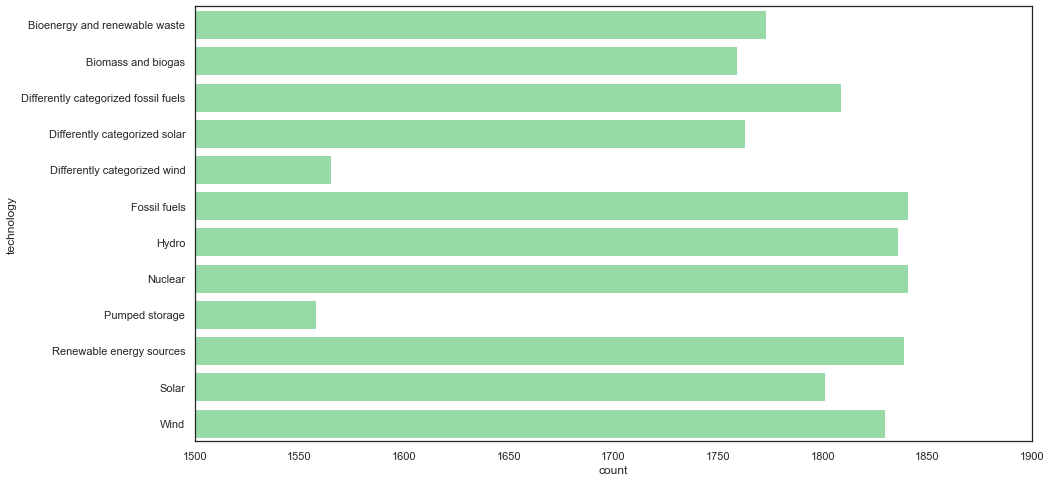

In [17]:
#Bar plot che mostra i count di ogni technology
height = 15
width= 8
fig, ax = plt.subplots(figsize=(height,width))

sns.set_style(style = "white")
sns.set_color_codes("pastel")
ax = sns.barplot(x="count", y="technology", data= data_1_2, color="g", ax = ax)
ax.set(xlim =(1500, 1900))

### Si può notare come Fossil fuel, nuclear e renewable energy sources sono le forme di energia più ripetute all'interno del DataFrame

# 2) Si vuole vedere se le energie più ripetute nel DataFrame sono anche quelle con più disponibilità in Europa
#### Pertanto si calcola il Total prodotto per ogni energia; questo implica la rimozione delle tecnologie (es: Pumped storage)

#### Utilizzando una Mask si mantengono i solo 'fuel' e 'energy source' usando la condizione logica *energy_source_level_1* = True | *energy_source_level_2* = True | *energy_source_level_3* = True

In [18]:
data_energy

technology                    source           source_type  \
0      Fossil fuels                 e-control  Regulatory Authority   
1      Fossil fuels                 e-control  Regulatory Authority   
2      Fossil fuels                 e-control  Regulatory Authority   
3      Fossil fuels                 e-control  Regulatory Authority   
4      Fossil fuels                 e-control  Regulatory Authority   
...             ...                       ...                   ...   
37274         Total  ENTSO-E Power Statistics     Other association   
37275         Total  ENTSO-E Power Statistics     Other association   
37276         Total  ENTSO-E Power Statistics     Other association   
37277         Total  ENTSO-E Power Statistics     Other association   
37278         Total  ENTSO-E Power Statistics     Other association   

      country_name capacity_definition  capacity  energy_source_level_0  \
0          AUSTRIA      Gross capacity  7243.634                  False   
1          AUSTRIA      Gross capacity  7059.065                  False   
2          AUSTRIA      Gross capacity  7323.000                  False   
3          AUSTRIA      Gross capacity  6469.000                  False   
4          AUSTRIA      Gross capacity  6492.000                  False   
...            ...                 ...       ...                    ...   
37274     SLOVAKIA        Net capacity  7800.000                   True   
37275     SLOVAKIA        Net capacity  7816.160                   True   
37276     SLOVAKIA        Net capacity  7556.000                   True   
37277     SLOVAKIA        Net capacity  7427.500                   True   
37278     SLOVAKIA        Net capacity  7435.500                   True   

       energy_source_level_1  energy_source_level_2  energy_source_level_3  \
0                       True                  False                  False   
1                       True                  False                  False   
2                       True                  False                  False   
3                       True                  False                  False   
4                       True                  False                  False   
...                      ...                    ...                    ...   
37274                  False                  False                  False   
37275                  False                  False                  False   
37276                  False                  False                  False   
37277                  False                  False                  False   
37278                  False                  False                  False   

       technology_level  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
37274             False  
37275             False  
37276             False  
37277             False  
37278             False  

[37279 rows x 11 columns]

In [19]:
#DataFrame ridotto dal quale si estraggono solo le righe con (data_2.energy_source_level_1 == True) | (data_2.energy_source_level_2 == True) | (data_2.energy_source_level_3 == True)
data_2 = data_energy[['technology', 'capacity', 'energy_source_level_1', 'energy_source_level_2','energy_source_level_3']]
data_2 = data_2[(data_2.energy_source_level_1 == True) | (data_2.energy_source_level_2 == True) | (data_2.energy_source_level_3 == True)]

data_2

technology  capacity  energy_source_level_1  \
0                  Fossil fuels  7243.634                   True   
1                  Fossil fuels  7059.065                   True   
2                  Fossil fuels  7323.000                   True   
3                  Fossil fuels  6469.000                   True   
4                  Fossil fuels  6492.000                   True   
...                         ...       ...                    ...   
37154  Renewable energy sources  3265.500                   True   
37155  Renewable energy sources  3255.660                   True   
37156  Renewable energy sources  3248.500                   True   
37157  Renewable energy sources  3249.000                   True   
37158  Renewable energy sources  3252.000                   True   

       energy_source_level_2  energy_source_level_3  
0                      False                  False  
1                      False                  False  
2                      False                  False  
3                      False                  False  
4                      False                  False  
...                      ...                    ...  
37154                  False                  False  
37155                  False                  False  
37156                  False                  False  
37157                  False                  False  
37158                  False                  False  

[25556 rows x 5 columns]

In [20]:
#Si crea un DataFrame con capacity totale (che tornerà utile dopo) e i 3 energy_source_level che ci permetteranno di fare un'osservazione
#Con la funzione .sum() si esegue una sommatoria di tutti i valori raggruppati per technology (.groupby())
data_2_energy_source = data_2.groupby(['technology']).sum()

data_2_energy_source

capacity  \
technology                                                       
Bioenergy and renewable waste                     7.388097e+05   
Biomass and biogas                                4.697159e+05   
Differently categorized fossil fuels              1.544495e+07   
Differently categorized renewable energy sources  1.228410e+05   
Fossil fuels                                      2.152486e+07   
Geothermal                                        4.292619e+04   
Hard coal                                         1.450619e+06   
Hydro                                             1.015092e+07   
Lignite                                           6.841372e+05   
Marine                                            9.991600e+03   
Mixed fossil fuels                                2.079454e+05   
Natural gas                                       3.034978e+06   
Non-renewable waste                               1.454083e+05   
Nuclear                                           6.774022e+06   
Oil                                               4.592132e+05   
Other bioenergy and renewable waste               2.738859e+05   
Other fossil fuels                                4.417082e+04   
Other or unspecified energy sources               2.652841e+05   
Renewable energy sources                          1.702300e+07   
Sewage and landfill gas                           1.853242e+03   
Solar                                             2.014501e+06   
Wind                                              3.969591e+06   

                                                  energy_source_level_1  \
technology                                                                
Bioenergy and renewable waste                                       0.0   
Biomass and biogas                                                  0.0   
Differently categorized fossil fuels                                0.0   
Differently categorized renewable energy sources                    0.0   
Fossil fuels                                                     1841.0   
Geothermal                                                          0.0   
Hard coal                                                           0.0   
Hydro                                                               0.0   
Lignite                                                             0.0   
Marine                                                              0.0   
Mixed fossil fuels                                                  0.0   
Natural gas                                                         0.0   
Non-renewable waste                                                 0.0   
Nuclear                                                          1841.0   
Oil                                                                 0.0   
Other bioenergy and renewable waste                                 0.0   
Other fossil fuels                                                  0.0   
Other or unspecified energy sources                               758.0   
Renewable energy sources                                         1839.0   
Sewage and landfill gas                                             0.0   
Solar                                                               0.0   
Wind                                                                0.0   

                                                  energy_source_level_2  \
technology                                                                
Bioenergy and renewable waste                                    1773.0   
Biomass and biogas                                                  0.0   
Differently categorized fossil fuels                             1809.0   
Differently categorized renewable energy sources                  646.0   
Fossil fuels                                                        0.0   
Geothermal                                                       1333.0   
Hard coal                                                         44

#### In realtà si potrebbe benissimo utilizzare come unica colonna 'capacity', tuttavia si è voluto importare momentaneamente i 3 energy_source_level; questo perchè grazie agli energy_source_level è possibile velocemente capire ogni technology di che categoria fa parte. Se il valore numerico nella colonna risulta essere 0 è perchè vi era un 'False' nel DataFrame originale, pertanto la technology non apparterrà a quel determinato energy_source_level.

### Si può immediatamente notare come le 3 technology più ricorrenti trovate nel primo esercizio (Fossil fuel, nuclear e renewable energy sources) risultano essere tutte del 'energy_source_level_1'.

In [21]:
#Estrazione dal DataFrame data_2_energy_source la variabile 'capacity' che poi tornerà utile per il grafico.
data_2_1 = data_2_energy_source[['capacity']]

In [22]:
#Export del DataFrame data_2
data_2_1.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_2_1.csv')

#Import DataFrame data_2
data_2_2 = pd.read_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_2_1.csv')

data_2_2

#Il cambio nome da 'data_2_1' a 'data_2_2' si è fatto solo ed esclusivamente per evitare sovrascrizioni che avrebbero potuto causare problemi in caso di riesecuzione dei comandi precedenti

technology      capacity
0                      Bioenergy and renewable waste  7.388097e+05
1                                 Biomass and biogas  4.697159e+05
2               Differently categorized fossil fuels  1.544495e+07
3   Differently categorized renewable energy sources  1.228410e+05
4                                       Fossil fuels  2.152486e+07
5                                         Geothermal  4.292619e+04
6                                          Hard coal  1.450619e+06
7                                              Hydro  1.015092e+07
8                                            Lignite  6.841372e+05
9                                             Marine  9.991600e+03
10                                Mixed fossil fuels  2.079454e+05
11                                       Natural gas  3.034978e+06
12                               Non-renewable waste  1.454083e+05
13                                           Nuclear  6.774022e+06
14                                               Oil  4.592132e+05
15               Other bioenergy and renewable waste  2.738859e+05
16                                Other fossil fuels  4.417082e+04
17               Other or unspecified energy sources  2.652841e+05
18                          Renewable energy sources  1.702300e+07
19                           Sewage and landfill gas  1.853242e+03
20                                             Solar  2.014501e+06
21                                              Wind  3.969591e+06

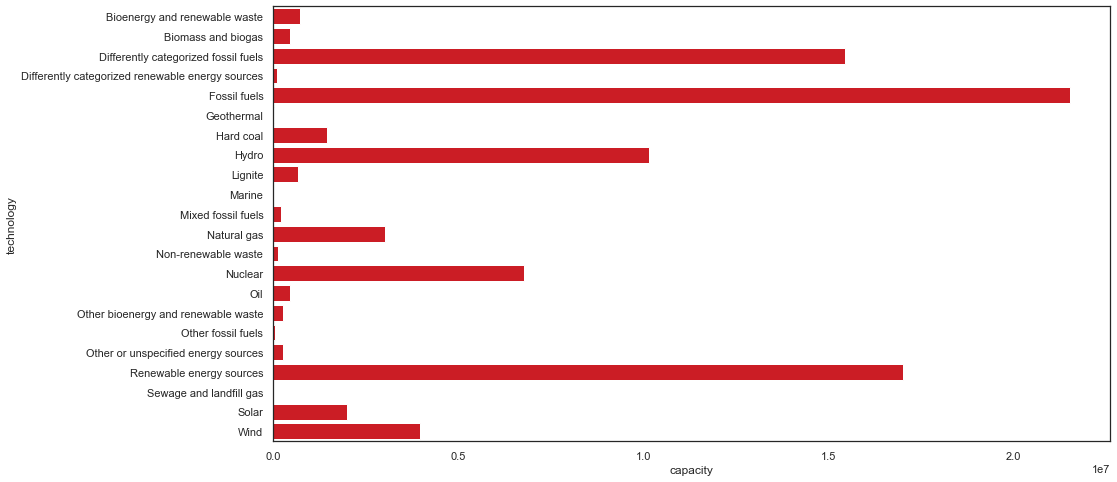

In [23]:
#Grafico che mostra la capacity di ogni forma di energia contenuta in data_2_2
height = 15
width= 8
fig, ax = plt.subplots(figsize=(height,width))

sns.set_style(style = "white")
sns.set_color_codes("bright")
ax = sns.barplot(x="capacity", y="technology", data= data_2_2, color="r", ax = ax)

### Come si può notare le technology con più ripetizioni all'interno del DataFrame non sono quelle con capacity maggiore. Infatti il Nuclear risulta essere una technology con 'count' tra i più elevati nel DataFrame, mentre risulta essere solo il quinto in termini di capacity.
### Discorso diverso per i Fossil Fuels che risultano essere tra i più elevati sia in termini di 'count' che di 'capacity'.

# 3) Si calcola la capacity massima per technology di ogni paese e poi si identifica quella che viene più utilizzata.

In [24]:
# Si crea un DataFrame (data_3) contenente i paesi europei con la relativa capacity per technology
data_3 = data_energy[['technology', 'country_name','capacity']]
data_3 = data_3[~data_3.technology.str.contains('Total')]

data_3

#Vengono rimosse le righe contenente Total all'interno delle technology.

technology country_name  capacity
0                  Fossil fuels      AUSTRIA  7243.634
1                  Fossil fuels      AUSTRIA  7059.065
2                  Fossil fuels      AUSTRIA  7323.000
3                  Fossil fuels      AUSTRIA  6469.000
4                  Fossil fuels      AUSTRIA  6492.000
...                         ...          ...       ...
37154  Renewable energy sources     SLOVAKIA  3265.500
37155  Renewable energy sources     SLOVAKIA  3255.660
37156  Renewable energy sources     SLOVAKIA  3248.500
37157  Renewable energy sources     SLOVAKIA  3249.000
37158  Renewable energy sources     SLOVAKIA  3252.000

[35438 rows x 3 columns]

In [25]:
#Questa funzione permette di raggruppare secondo le colonne indicate e poi sommare tutti i valori. Così facendo otteniamo la capacità massima per technology di ogni country.
data_3_1 = data_3.groupby(['country_name', 'technology']).sum()

In [26]:
#Export del DataFrame data_3_1
data_3_1.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_3_1.csv')

#Import DataFrame data_3_1
data_3_2 = pd.read_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_3_1.csv')

data_3_2

country_name                            technology       capacity
0            ALBANIA         Bioenergy and renewable waste       0.000000
1            ALBANIA                    Biomass and biogas       0.000000
2            ALBANIA              Concentrated solar power       0.000000
3            ALBANIA  Differently categorized fossil fuels     489.000000
4            ALBANIA         Differently categorized hydro       0.000000
...              ...                                   ...            ...
1288  UNITED KINGDOM    Reservoir including pumped storage    5480.000000
1289  UNITED KINGDOM                          Run-of-river   21575.267568
1290  UNITED KINGDOM               Sewage and landfill gas    1277.662310
1291  UNITED KINGDOM                                 Solar  120969.420768
1292  UNITED KINGDOM                                  Wind  372850.612318

[1293 rows x 3 columns]

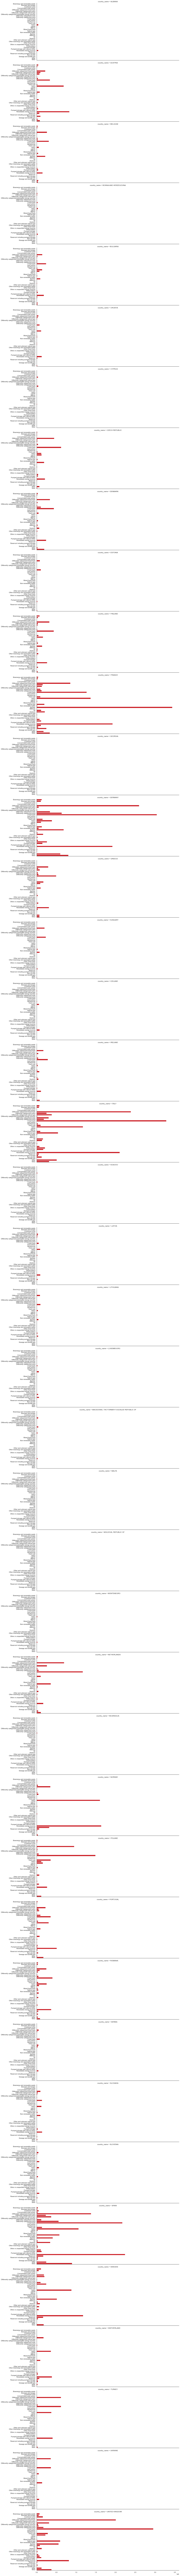

In [27]:
#Viene creato il FacetGrid per ogni 'country_name' indicando la capacity di ogni technology
#Si importa 'technology_list' dal file 'technology.py' (L'ordine delle technology è dato da technology_list)
from technology import technology_list

x = sns.FacetGrid(data_3_2, row = 'country_name', height = 6, aspect = 3)
x = x.map(sns.barplot, 'capacity', 'technology', order = technology_list, color = 'r')
x = x.set_axis_labels("", "")

#### Vi sono dei BarPlot che sembrerebbero non aver alcun dato al loro interno, in realtà ciò è dovuto da un enorme squilibrio tra le capacity di differenti paesi. Chiaramente le capacity più piccole non riescono ad essere visibili  mantenendo le proporzioni corrette tra i dati.

In [28]:
#Per ogni country viene estratta la technology con la capacity massima.
data_3_3 = data_3_2.groupby('country_name').apply(lambda x: x.loc[x.capacity == x.capacity.max(),['technology','capacity']])

data_3_3

technology  \
country_name                                                                            
ALBANIA                                    11                                   Hydro   
                                           25                Renewable energy sources   
AUSTRIA                                    57                Renewable energy sources   
BELGIUM                                    72                            Fossil fuels   
BOSNIA AND HERZEGOVINA                     120               Renewable energy sources   
BULGARIA                                   135                           Fossil fuels   
CROATIA                                    186               Renewable energy sources   
CYPRUS                                     200                           Fossil fuels   
CZECH REPUBLIC                             233                           Fossil fuels   
DENMARK                                    267                           Fossil fuels   
ESTONIA                                    300                           Fossil fuels   
FINLAND                                    333                           Fossil fuels   
FRANCE                                     375                                Nuclear   
GEORGIA                                    405               Renewable energy sources   
GERMANY                                    416                           Fossil fuels   
GREECE                                     449                           Fossil fuels   
HUNGARY                                    483                           Fossil fuels   
ICELAND                                    531               Renewable energy sources   
IRELAND                                    546                           Fossil fuels   
ITALY                                      580                           Fossil fuels   
KOSOVO                                     607   Differently categorized fossil fuels   
                                           610                           Fossil fuels   
LATVIA                                     649               Renewable energy sources   
LITHUANIA                                  664                           Fossil fuels   
LUXEMBOURG                                 714               Renewable energy sources   
MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF 729                           Fossil fuels   
MALTA                                      755   Differently categorized fossil fuels   
                                           758                           Fossil fuels   
MOLDOVA, REPUBLIC OF                       773   Differently categorized fossil fuels   
                                           776                           Fossil fuels   
MONTENEGRO                                 799                                  Hydro   
                                           813               Renewable energy sources   
NETHERLANDS                                828                           Fossil fuels   
NICARAGUA                                  859                           Fossil fuels   
NORWAY                                     902               Renewable energy sources   
POLAND                                     917                           Fossil fuels   
PORTUGAL                                   970               Renewable energy sources   
ROMANIA                                    985                           Fossil fuels   
SERBIA                                     1017                          Fossil fuels   
SLOVAKIA                                   1069              Renewable energy sources   
SLOVENIA                                   1084                          Fossil fuels   
SPAIN                                      1137              Renewable energy sources   
SWEDEN                                     1170              Renewable energy sources   
SWITZERLAND                                1202              Renewable

In [29]:
#Export del DataFrame data_3_3
data_3_3.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_3_3.csv')

#### Grazie a questo DataFrame è possibile vedere qual è la technology con la capacity massima per ogni country. I numeri vicino ai nomi dei paese rappresentano la riga all'interno della quale vi è l'informazione nel dataframe data_3_3.
#### Può capitare che per ogni paese ci siano 2 technology differenti: questo è dato dal fatto che la capacity risulta essere uguale.


# 4) Si calcola la capacity totale per ogni paese ('capacity_tot_country') con relativo grafico.

In [30]:
#Si calcola la capacity totale di ogni paese indistintamente dalla technology.
data_4 = data_3_2.groupby(['country_name']).sum()
data_4_1 = data_4.rename(columns = {'capacity': 'capacity_tot_country'})

In [31]:
#Export del DataFrame data_4_1
data_4_1.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_4_1.csv')

#Import DataFrame data_4_1
data_4_2 = pd.read_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_4_1.csv')

data_4_2

country_name  capacity_tot_country
0                                      ALBANIA          8.108200e+04
1                                      AUSTRIA          2.828249e+06
2                                      BELGIUM          1.266096e+06
3                       BOSNIA AND HERZEGOVINA          1.189820e+05
4                                     BULGARIA          1.053892e+06
5                                      CROATIA          4.738846e+05
6                                       CYPRUS          8.832300e+04
7                               CZECH REPUBLIC          2.011952e+06
8                                      DENMARK          1.611209e+06
9                                      ESTONIA          2.510759e+05
10                                     FINLAND          1.722183e+06
11                                      FRANCE          1.114091e+07
12                                     GEORGIA          4.920000e+03
13                                     GERMANY          1.237495e+07
14                                      GREECE          1.897519e+06
15                                     HUNGARY          5.807696e+05
16                                     ICELAND          1.674326e+05
17                                     IRELAND          9.300325e+05
18                                       ITALY          1.274033e+07
19                                      KOSOVO          3.254200e+04
20                                      LATVIA          3.383801e+05
21                                   LITHUANIA          3.392987e+05
22                                  LUXEMBOURG          2.033388e+05
23  MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF          1.277540e+05
24                                       MALTA          1.357800e+04
25                        MOLDOVA, REPUBLIC OF          6.746000e+03
26                                  MONTENEGRO          4.321800e+04
27                                 NETHERLANDS          3.133062e+06
28                                   NICARAGUA          3.209000e+04
29                                      NORWAY          4.125561e+06
30                                      POLAND          3.748509e+06
31                                    PORTUGAL          2.128029e+06
32                                     ROMANIA          1.947033e+06
33                                      SERBIA          2.685410e+05
34                                    SLOVAKIA          7.440328e+05
35                                    SLOVENIA          3.369961e+05
36                                       SPAIN          1.139079e+07
37                                      SWEDEN          4.078142e+06
38                                 SWITZERLAND          1.220885e+06
39                                      TURKEY          2.062465e+06
40                                     UKRAINE          9.925958e+05
41                              UNITED KINGDOM          9.305405e+06

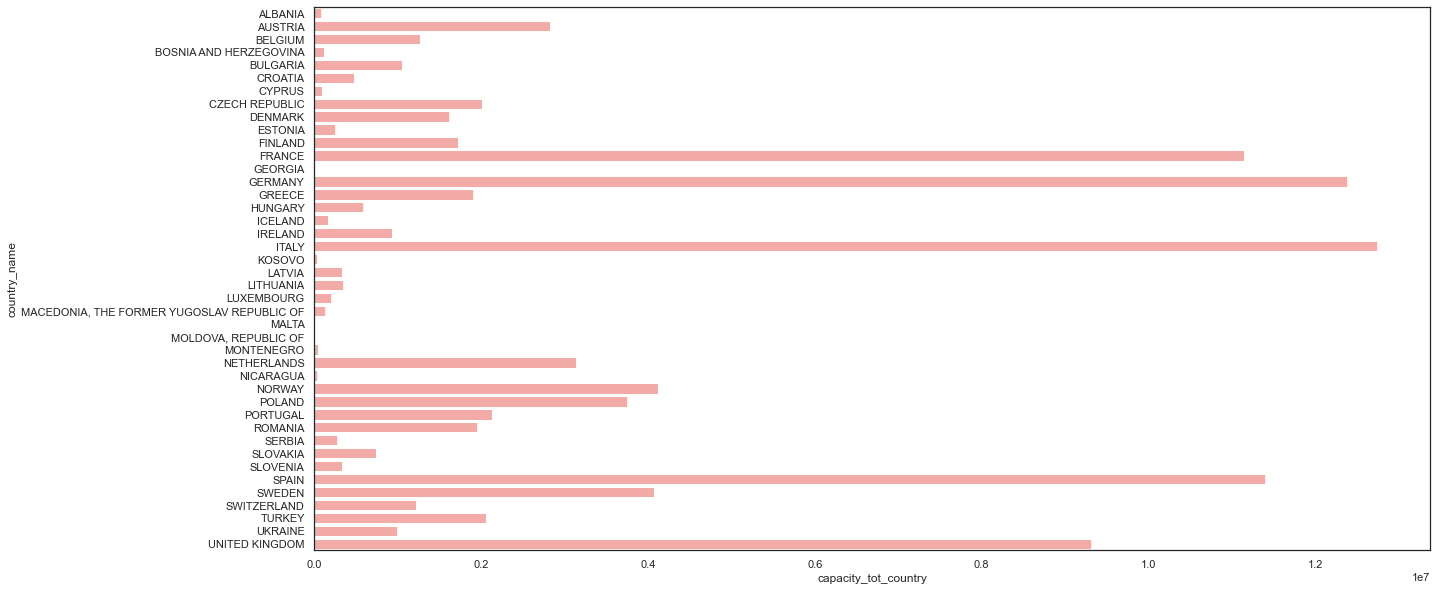

In [32]:
#Grafico che mette in relazione le capacity_tot_country
height = 20
width= 10
fig, ax = plt.subplots(figsize=(height,width))

sns.set_style(style = "white")
sns.set_color_codes("pastel")
ax = sns.barplot(x="capacity_tot_country", y="country_name", data= data_4_2, color="r", ax = ax)

### Possiamo notare come Francia, Germania, Italia, Spagna e Gran Bretagna risultano avere la maggior capacity a livello europeo.

![map_capacity_tot](map_capacity_tot.png)

# 5) Si vuole vedere in % la quantità di energia rinnovabile per ogni paese e poi la % sul totale della capacity europea.

In [33]:
#Si crea un filtro per selezionare tutte le forme di energia rinnovabile per poi sommarle e ottenere un'unica variabile che ne indichi la capacity
#Per far ciò si potrebbe sfruttare il fatto che tutte le energie rinnovabili hanno valore True nella colonna energy_source_level_3. Tuttavia useremo str.contains per ottenere solo le righe che hanno Renewable al loro interno.

data_5 = data_3_2[data_3_2.technology.str.contains('renewable') | data_3_2.technology.str.contains('Renewable') ]

#Ovviamente tutte le energie NON rinnovabili vengono filtrate e inserite nel DataFrame, quindi con il prossimo comando le si rimuovono.
data_5_1 = data_5[~data_5.technology.str.contains('Non')] 

#Si rimuovono tutti i valori con capacity < 1 
data_5_2 = data_5_1.loc[data_5_1 ['capacity'] > 0]

data_5_2

country_name                                        technology  \
25           ALBANIA                          Renewable energy sources   
30           AUSTRIA                     Bioenergy and renewable waste   
36           AUSTRIA  Differently categorized renewable energy sources   
52           AUSTRIA               Other bioenergy and renewable waste   
57           AUSTRIA                          Renewable energy sources   
...              ...                                               ...   
1252         UKRAINE                          Renewable energy sources   
1257  UNITED KINGDOM                     Bioenergy and renewable waste   
1264  UNITED KINGDOM  Differently categorized renewable energy sources   
1281  UNITED KINGDOM               Other bioenergy and renewable waste   
1286  UNITED KINGDOM                          Renewable energy sources   

           capacity  
25     39952.000000  
30     40037.559220  
36      2680.278000  
52     26674.760000  
57    827115.690057  
...             ...  
1252   60215.760000  
1257   71469.833638  
1264   31748.700000  
1281   19868.203796  
1286  817493.506852  

[139 rows x 3 columns]

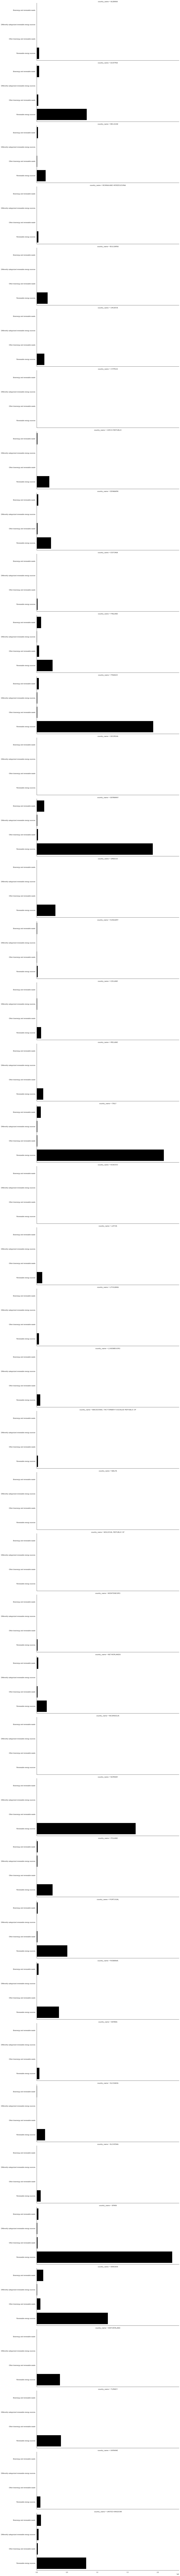

In [34]:
#Grafico che mostra tute le energie rinnovabili per paese
#Si importa 'technology_list_renewable' dal file 'technology_renable.py'
from technology_renewable import technology_list_renewable

x = sns.FacetGrid(data_5_2, row = 'country_name', height = 6, aspect = 3)
x = x.map(sns.barplot, 'capacity', 'technology', order = technology_list_renewable, color = 'black')
x = x.set_axis_labels("", "")

In [35]:
#Si calcola il valore delle country_renewable_tot per ogni paese
data_5_3 = data_5_2.groupby(['country_name']).sum()
data_5_3 = data_5_3.rename(columns = {'capacity': 'country_renewable_tot'})
data_5_3 = data_5_3.reset_index()

data_5_3

country_name  country_renewable_tot
0                                      ALBANIA           3.995200e+04
1                                      AUSTRIA           8.965083e+05
2                                      BELGIUM           1.769877e+05
3                       BOSNIA AND HERZEGOVINA           2.855500e+04
4                                     BULGARIA           1.832142e+05
5                                      CROATIA           1.291306e+05
6                                       CYPRUS           3.307000e+03
7                               CZECH REPUBLIC           2.266155e+05
8                                      DENMARK           2.786425e+05
9                                      ESTONIA           1.807911e+04
10                                     FINLAND           3.810360e+05
11                                      FRANCE           1.979411e+06
12                                     GEORGIA           2.450000e+03
13                                     GERMANY           2.075312e+06
14                                      GREECE           3.136464e+05
15                                     HUNGARY           3.128120e+04
16                                     ICELAND           7.844380e+04
17                                     IRELAND           1.125740e+05
18                                       ITALY           2.189198e+06
19                                      KOSOVO           7.090000e+02
20                                      LATVIA           9.478891e+04
21                                   LITHUANIA           3.848858e+04
22                                  LUXEMBOURG           5.938558e+04
23  MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF           2.051800e+04
24                                       MALTA           3.120000e+02
25                        MOLDOVA, REPUBLIC OF           1.430000e+02
26                                  MONTENEGRO           1.453600e+04
27                                 NETHERLANDS           2.069020e+05
28                                   NICARAGUA           3.340000e+03
29                                      NORWAY           1.638141e+06
30                                      POLAND           2.952307e+05
31                                    PORTUGAL           5.392372e+05
32                                     ROMANIA           4.029001e+05
33                                      SERBIA           4.445900e+04
34                                    SLOVAKIA           1.481589e+05
35                                    SLOVENIA           6.693636e+04
36                                       SPAIN           2.293229e+06
37                                      SWEDEN           1.352483e+06
38                                 SWITZERLAND           3.882786e+05
39                                      TURKEY           4.050740e+05
40                                     UKRAINE           6.035576e+04
41                              UNITED KINGDOM           9.405802e+05

In [36]:
#Si crea un nuovo dataframe contenente come colonne 'country_renewable_tot' (data_5_3) e 'capacity_tot_country' (data_4_2).
data_6 = pd.merge(left = data_5_3, right = data_4_2, on = 'country_name')
data_6

country_name  country_renewable_tot  \
0                                      ALBANIA           3.995200e+04   
1                                      AUSTRIA           8.965083e+05   
2                                      BELGIUM           1.769877e+05   
3                       BOSNIA AND HERZEGOVINA           2.855500e+04   
4                                     BULGARIA           1.832142e+05   
5                                      CROATIA           1.291306e+05   
6                                       CYPRUS           3.307000e+03   
7                               CZECH REPUBLIC           2.266155e+05   
8                                      DENMARK           2.786425e+05   
9                                      ESTONIA           1.807911e+04   
10                                     FINLAND           3.810360e+05   
11                                      FRANCE           1.979411e+06   
12                                     GEORGIA           2.450000e+03   
13                                     GERMANY           2.075312e+06   
14                                      GREECE           3.136464e+05   
15                                     HUNGARY           3.128120e+04   
16                                     ICELAND           7.844380e+04   
17                                     IRELAND           1.125740e+05   
18                                       ITALY           2.189198e+06   
19                                      KOSOVO           7.090000e+02   
20                                      LATVIA           9.478891e+04   
21                                   LITHUANIA           3.848858e+04   
22                                  LUXEMBOURG           5.938558e+04   
23  MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF           2.051800e+04   
24                                       MALTA           3.120000e+02   
25                        MOLDOVA, REPUBLIC OF           1.430000e+02   
26                                  MONTENEGRO           1.453600e+04   
27                                 NETHERLANDS           2.069020e+05   
28                                   NICARAGUA           3.340000e+03   
29                                      NORWAY           1.638141e+06   
30                                      POLAND           2.952307e+05   
31                                    PORTUGAL           5.392372e+05   
32                                     ROMANIA           4.029001e+05   
33                                      SERBIA           4.445900e+04   
34                                    SLOVAKIA           1.481589e+05   
35                                    SLOVENIA           6.693636e+04   
36                                       SPAIN           2.293229e+06   
37                                      SWEDEN           1.352483e+06   
38                                 SWITZERLAND           3.882786e+05   
39                                      TURKEY           4.050740e+05   
40                                     UKRAINE           6.035576e+04   
41                              UNITED KINGDOM           9.405802e+05   

    capacity_tot_country  
0           8.108200e+04  
1           2.828249e+06  
2           1.266096e+06  
3           1.189820e+05  
4           1.053892e+06  
5           4.738846e+05  
6           8.832300e+04  
7           2.011952e+06  
8           1.611209e+06  
9           2.510759e+05  
10          1.722183e+06  
11          1.114091e+07  
12          4.920000e+03  
13          1.237495e+07  
14          1.897519e+06  
15          5.807696e+05  
16          1.674326e+05  
17          9.300325e+05  
18          1.274033e+07  
19          3.254200e+04  
20          3.383801e+05  
21          3.392987e+05  
22          2.033388e+05  
23          1.277540e+05  
24          1.357800e+04  
25          6.746000e+03  
26          4.321800e+04  
27          3.133062e+06  
28          3.209000e+04  
29          4.125561e+06  
30          3.748509e+06  
31          2.128029e+06  
32 

#### Si calcola la % di energie rinnovabili per ogni paese:

In [37]:
data_6['percent_renewable_energy'] = (data_6['country_renewable_tot']/data_6['capacity_tot_country'])*100

data_6

country_name  country_renewable_tot  \
0                                      ALBANIA           3.995200e+04   
1                                      AUSTRIA           8.965083e+05   
2                                      BELGIUM           1.769877e+05   
3                       BOSNIA AND HERZEGOVINA           2.855500e+04   
4                                     BULGARIA           1.832142e+05   
5                                      CROATIA           1.291306e+05   
6                                       CYPRUS           3.307000e+03   
7                               CZECH REPUBLIC           2.266155e+05   
8                                      DENMARK           2.786425e+05   
9                                      ESTONIA           1.807911e+04   
10                                     FINLAND           3.810360e+05   
11                                      FRANCE           1.979411e+06   
12                                     GEORGIA           2.450000e+03   
13                                     GERMANY           2.075312e+06   
14                                      GREECE           3.136464e+05   
15                                     HUNGARY           3.128120e+04   
16                                     ICELAND           7.844380e+04   
17                                     IRELAND           1.125740e+05   
18                                       ITALY           2.189198e+06   
19                                      KOSOVO           7.090000e+02   
20                                      LATVIA           9.478891e+04   
21                                   LITHUANIA           3.848858e+04   
22                                  LUXEMBOURG           5.938558e+04   
23  MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF           2.051800e+04   
24                                       MALTA           3.120000e+02   
25                        MOLDOVA, REPUBLIC OF           1.430000e+02   
26                                  MONTENEGRO           1.453600e+04   
27                                 NETHERLANDS           2.069020e+05   
28                                   NICARAGUA           3.340000e+03   
29                                      NORWAY           1.638141e+06   
30                                      POLAND           2.952307e+05   
31                                    PORTUGAL           5.392372e+05   
32                                     ROMANIA           4.029001e+05   
33                                      SERBIA           4.445900e+04   
34                                    SLOVAKIA           1.481589e+05   
35                                    SLOVENIA           6.693636e+04   
36                                       SPAIN           2.293229e+06   
37                                      SWEDEN           1.352483e+06   
38                                 SWITZERLAND           3.882786e+05   
39                                      TURKEY           4.050740e+05   
40                                     UKRAINE           6.035576e+04   
41                              UNITED KINGDOM           9.405802e+05   

    capacity_tot_country  percent_renewable_energy  
0           8.108200e+04                 49.273575  
1           2.828249e+06                 31.698352  
2           1.266096e+06                 13.979012  
3           1.189820e+05                 23.999428  
4           1.053892e+06                 17.384540  
5           4.738846e+05                 27.249375  
6           8.832300e+04                  3.744212  
7           2.011952e+06                 11.263467  
8           1.611209e+06                 17.294005  
9           2.510759e+05                  7.200655  
10          1.722183e+06                 22.125180  
11          1.114091e+07                 17.767052  
12          4.920000e+03                 49.796748  
13          1.237495e+07                 16.770274  
14          1.897519e+06                 16.529284  
15          5.807696e+05                  5.38

In [38]:
#Export del DataFrame data_6
data_6.to_csv(r'C:\Users\Marco Lombardini\Desktop\ComputerSociety\MaterialeEsercizi\data_6.csv')

## Grafico che mette in relazione le % ottenute

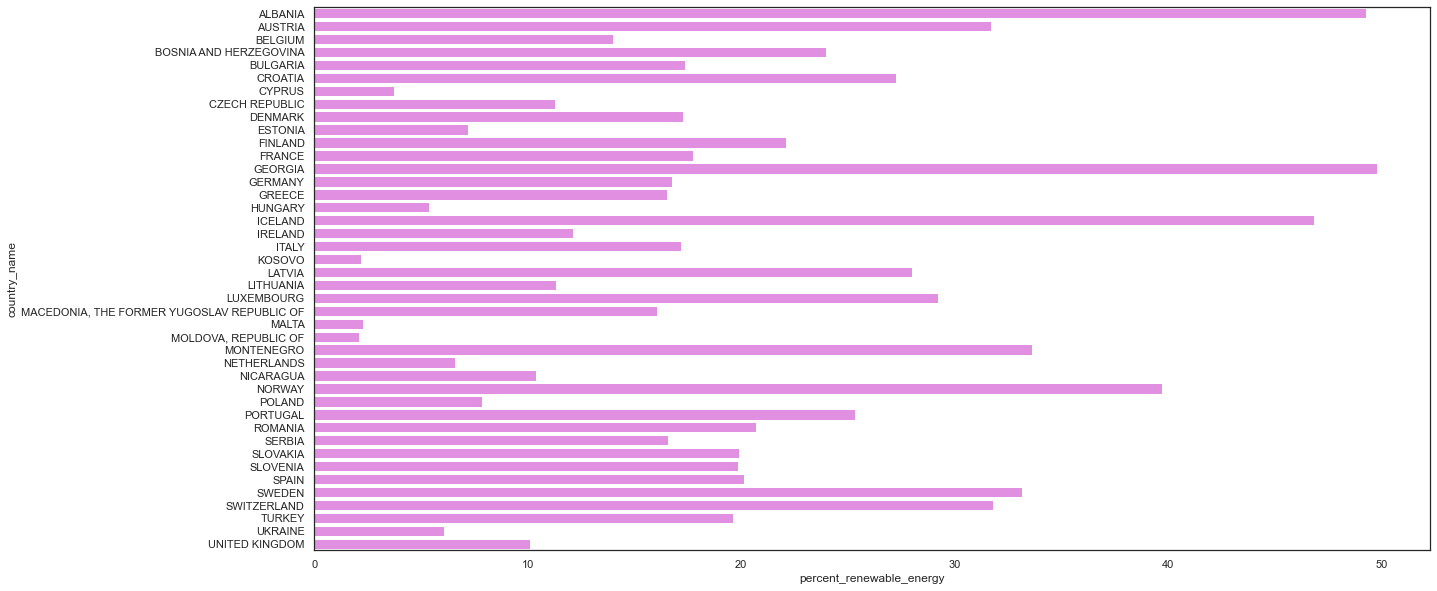

In [39]:
height = 20
width= 10
fig, ax = plt.subplots(figsize=(height,width))

sns.set_style(style = "white")
ax = sns.barplot(x="percent_renewable_energy", y="country_name", data= data_6, color="violet", ax = ax)

### Si nota come paesi con capacity basse risultano avere una % di energia rinnovabile maggiore rispetto a paesi con una capacity elevata (es: Albania e Georgia rispetto ad Italia, Germania, etc...)

![map_percent_renewable_energy](map_percent_renewable_energy.png)

## Si procede calcolando e mostrando la % di energia totale rinnovabile sul territorio europeo.

In [40]:
#Si crea la variabile ('capacity_tot') data dalla somma delle capacity_tot_country.
capacity_tot = data_4_2['capacity_tot_country'].sum()

#Si crea la variabile ('renewable_tot') data dalla somma delle country_renewable_tot.
renewable_tot = data_6['country_renewable_tot'].sum()

#Si calcola la % di energia totale rinnovabile sul territorio europeo.
percent_renewable_tot = (renewable_tot/ capacity_tot)*100

#Si mostra il valore delle variabili appena calcolate.
print('Il valore capacity_tot è:\n',capacity_tot)
print('Il valore renewable_tot è:\n',renewable_tot)
print('Il valore % di energia totale rinnovabile sul territorio europeo è:\n', percent_renewable_tot)

Il valore capacity_tot è:
 97962785.02567886
Il valore renewable_tot è:
 18158532.21450893
Il valore % di energia totale rinnovabile sul territorio europeo è:
 18.536153509466942


### Si può chiaramente intuire che paesi con alta capacity totale ma con bassa capacity_renewable (come Italia, Francia, etc...) abbassano drasticamente la media sul territorio europeo. Infatti paesi con elelevata % di energia rinnovabile ma con bassa capacity totale (come l'Albania) non sono in grado di influire significativamente sul totale europeo. 
### Detto ciò, si nota come le energie rinnovabili utilizzate sul territorio europeo risultano essere solo il 20% circa della capacity_tot europea.

## Si realizza il Bar Plot raffigurante i valori appena calcolati (capacity_tot e della renewable_tot)

In [41]:
#Si crea un nuovo DataFrame da utilizzare nel Bar Plot che mostra solo 'capacity_tot_country' e 'renewable_tot'
list = [pd.Series(['capacity_tot_country', 97962785.02567886]),
        pd.Series(['renewable_tot', 18158532.21450893])]

two_value = pd.DataFrame()
two_value_1 = two_value.append(list)
two_value_1.columns = ['type_total', 'capacity']

two_value_1

type_total      capacity
0  capacity_tot_country  9.796279e+07
1         renewable_tot  1.815853e+07

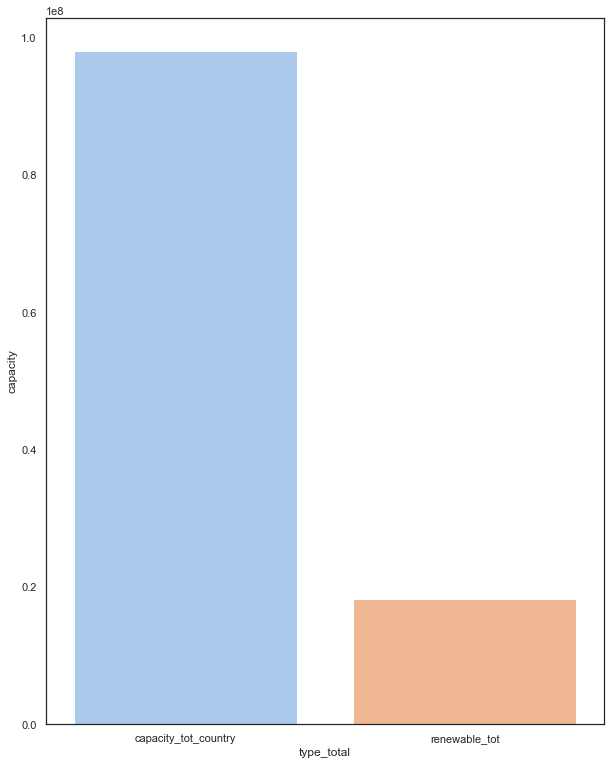

In [42]:
#Si procede con la realizzazione del Bar Plot.
height = 10
width= 13
fig, ax = plt.subplots(figsize=(height,width))

sns.set_style(style = 'white')
sns.set_color_codes("pastel")
sns.barplot(x='type_total', y='capacity', data= two_value_1, palette = 'pastel', ax = ax)

# 6) Mappe dinamiche delle Choropleth maps sopra indicate

### Ogni Choropleth maps dispone di una mappa dinamica su un sito esterno. Se vi si vuole accedere digitare:
### 1 - per la mappa delle capacity_tot
### 2 - per la mappa delle percent_renewable_energy

#### Facendo lo zoom sulle mappe interattive compariranno i nomi dei paesi.

In [ ]:
#Il primo ciclo if-else svolge una funzione di controllo sul numero inserito dall'utente: se il numero risulta essere errato apparirà un messaggio di errore.
#Il secondo ciclo if-else svolge la funzione vera e propria, reindirizzando l'utente verso il sito desiderato.

#Eseguire il numero inserito con Invio o Shift-Invio (non eseguire con il tasto Run).
import webbrowser

n = int(input('Inserire il numero:'))

if (n == 1) | (n == 2):
    print('Il numero inserito è corretto, attendere di essere reindirizzati al sito:')
    
    if (n == 1):
        webbrowser.open('//www.datawrapper.de/_/gtj2x/') 
    
    else:
        webbrowser.open('//www.datawrapper.de/_/Sy3QR/')
        
else:
    print('Il numero inserito non è corretto, riprovare.')

***
# Conclusioni

### Dall’analisi effettuata sul Dataset “National generation capacity” ricaviamo molte informazioni differenti.
### In primo luogo, andando ad analizzare i tipi di technology presenti nel DataFrame – appartenenti a diversi paesi europei – si può notare come le fossil fuel, nuclear e renewable energy, sono le forme di energia più ripetute tra tutti i tipi di energia presenti nel DataFrame.
### Successivamente, siamo andati a verificare se le energie più ripetute nel DataFrame (che come detto precedentemente sono fossil fuel, nuclear e renewable energy) sono anche le energie con più disponibilità in Europa. Notiamo però che le tre technology più ripetute, appartengono alla stessa categoria “energy_source_level_1” e che inoltre, non sono le technology con capacity maggiore. Infatti, per esempio, il nuclear è una technology con “count” tra i più elevati nel DataFrame, ma è solo il quinto in termini di capacity. È una casualità, invece, che i fossil fuel sono i più elevati sia in termini di “count” che di “capacity”.
### Calcolando poi la capacity massima per technology di ogni paese e identificando quella che viene utilizzata di più, scopriamo, attraverso la tabella finale al punto 3, che può succedere che per ogni paese ci siano due technology differenti: questo è dato dal fatto che la capacity risulta essere uguale.
### Andando a calcolare la capacity totale per ogni paese, notiamo come Francia, Germania, Italia, Spagna e Regno Unito hanno la maggior capacity a livello europeo. È possibile visionare il grafico al punto 4.
### Poi siamo andati a calcolare la percentuale della quantità di energia rinnovabile di ogni paese e ci siamo accorti come i paesi con capacity basse risultano avere una % di energia rinnovabile maggiore rispetto a paesi con una capacity elevata (per esempio Albania e Georgia rispetto ad Italia, Germania, etc...). Calcolando invece la percentuale sul totale della capacity europea è emerso che i paesi con alta capacity totale, ma con bassa capacity_renewable (come per esempio Italia e Francia), abbassino drasticamente la media sul territorio europeo. Infatti, paesi con elevata percentuale di energia rinnovabile, ma con bassa capacity totale (come per esempio l’Albania), non sono in grado di influire significativamente sul totale europeo. Si nota quindi come le energie rinnovabili utilizzate sul territorio europeo sono solo il 20% circa della capacity_tot europea.
### Infine, abbiamo realizzato delle mappe dinamiche (Choropleth maps) che rappresentano l’Europa sia in termini di capacity_tot (mappa numero 1) e sia in termini di percent_renewable_energy (mappa numero 2).
